## Prática: Optical Caracter Recognition

Nesta prática será feita uma investigação sobre a base de dados, bem como identificação de ruídos. Na sequência será feita seleção de atributos e transformações sobre eles.
[Maiores detalhes sobre a prática](https://docs.google.com/document/d/19hujByNpyvDqJYW2QCeU-ecJK4uSLTslBXaouM9N05c/edit?usp=sharing)

## Antes de começar...

**Dependencias:** instalar Weka.

## Parte 1 - Explorando os dados

Sua primeira tarefa é aprender sobre a coleção e verificar ruídos nas mesmas

**Atividade 1**: Observe os histogramas (distribuições de classe por atributos). No pandas, existe o método describe e, no Weka, os histogramas estão na aba de preprocessamento e os gráficos  de espalhamento na aba “Visualize” (não esqueça de aplicar o jitter). Olhe também as instâncias usando o botão edit e tente visualiza-la por meio de um heatmap1. Como o dígito está sendo representado nesta imagem (ou seja, qual cor é o fundo e qual a é a cor do dígito)? Você percebe algo de incomum em alguma instância? Existe alguma instância com atributos que podem representar ruídos? Descreva qualquer características que lhe chame a atenção (dica: pense que valores você esperaria nos pixels de diferentes áreas da imagem).


In [1]:
import pandas as pd
all_data = pd.read_csv('mnist_avaliacao.csv', sep=',')
test_data = pd.read_csv('mnist_teste.csv', sep=',')

In [2]:
# overview types
all_data.dtypes.value_counts()

int64    785
dtype: int64

In [3]:
# take a look at the last columns 
all_data.dtypes.tail()

pixel_28_25    int64
pixel_28_26    int64
pixel_28_27    int64
pixel_28_28    int64
y_class        int64
dtype: object

In [4]:
# lets take a look at the 'class' balance. I had to rename to 'y_class', because class is already in use in python 
all_data.y_class

0       8
1       7
2       5
3       6
4       5
       ..
2044    4
2045    1
2046    6
2047    8
2048    8
Name: y_class, Length: 2049, dtype: int64

In [5]:
# take a look at the minimum value avaible
all_data.iloc[:, :-1].min().value_counts()

0    784
dtype: int64

In [6]:
# take a look at the maximum value avaible
all_data.iloc[:, :-1].max().value_counts()

255    467
254    207
253     70
252     23
251     12
250      4
247      1
dtype: int64

In [7]:
# lets overview values
all_data.describe()

,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_1_8,pixel_1_9,pixel_1_10,...,pixel_28_20,pixel_28_21,pixel_28_22,pixel_28_23,pixel_28_24,pixel_28_25,pixel_28_26,pixel_28_27,pixel_28_28,y_class
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,5.418253,5.599317,5.452416,5.510005,5.542704,5.527086,5.403612,5.579307,5.550512,5.513421,...,5.937531,5.731576,5.618838,5.571498,5.485603,5.507565,5.508053,5.584675,5.573450,4.573450
std,34.360711,35.502751,34.561946,34.924724,35.135678,35.024662,34.264219,35.374181,35.190643,34.964895,...,36.003499,35.599994,35.547952,35.319550,34.772333,34.904754,34.938311,35.386521,35.324978,2.907022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,251.000000,253.000000,253.000000,254.000000,254.000000,252.000000,252.000000,254.000000,253.000000,254.000000,...,253.000000,254.000000,254.000000,254.000000,252.000000,253.000000,254.000000,253.000000,254.000000,9.000000


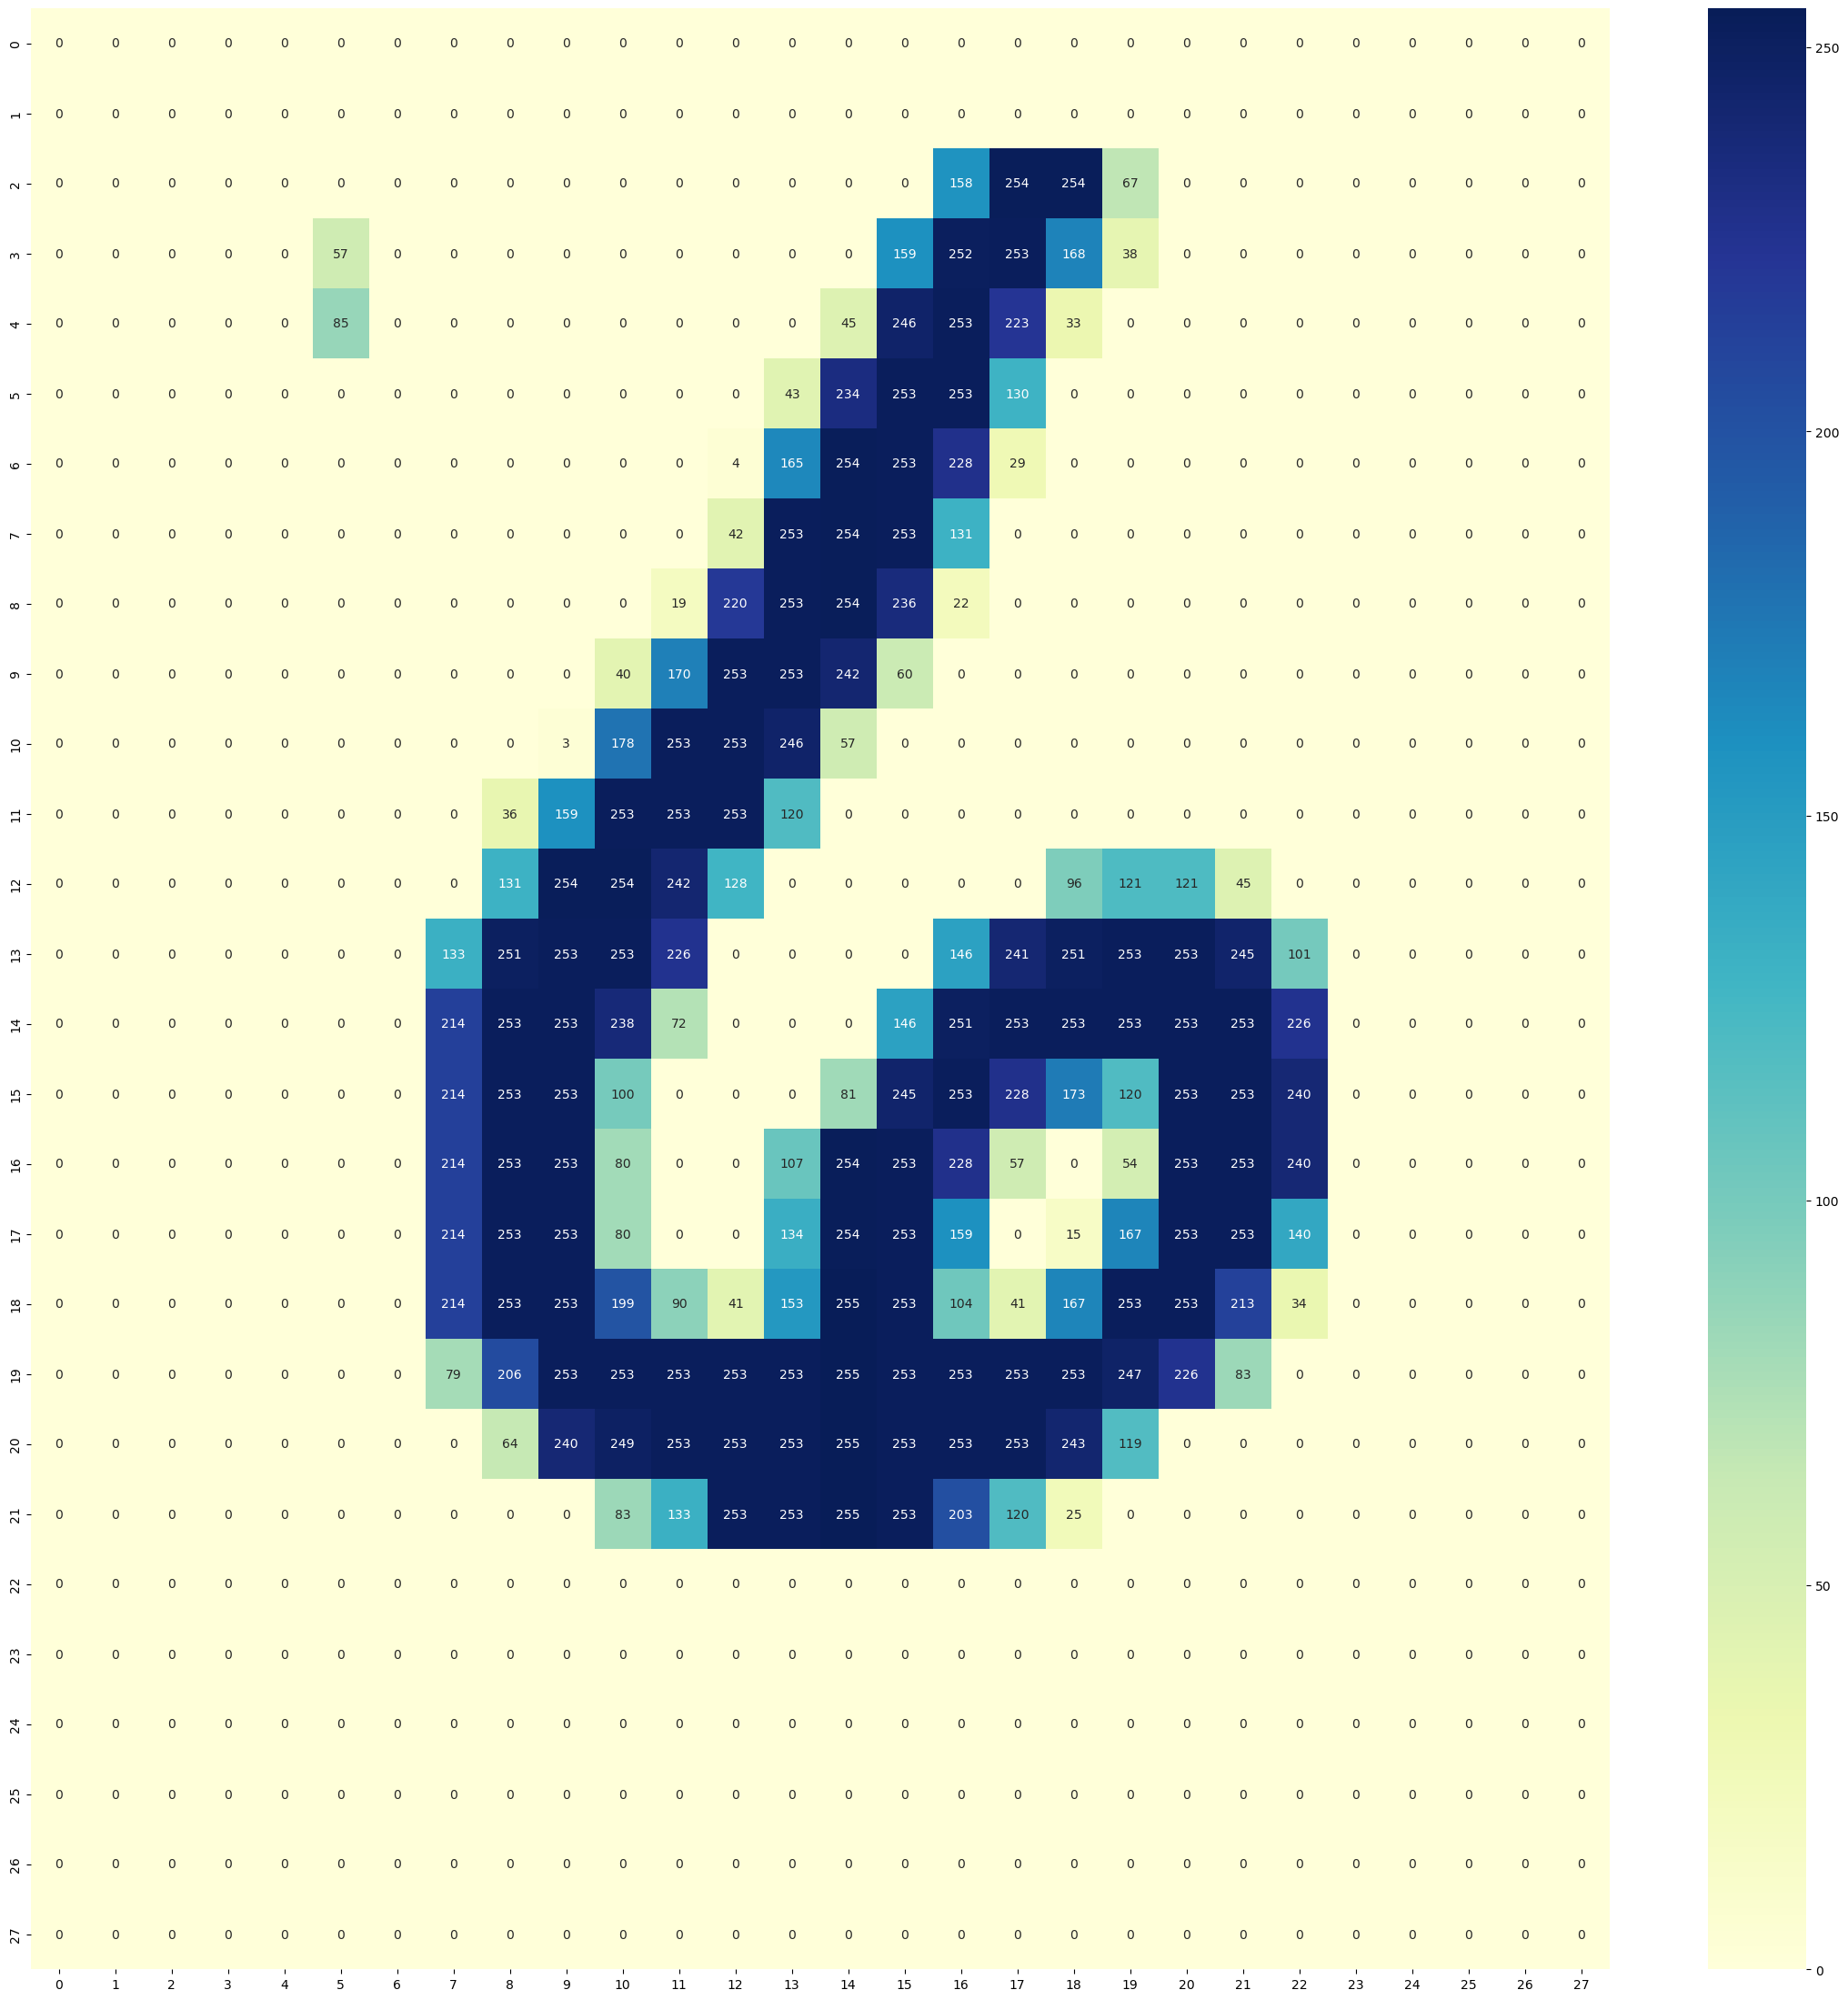

In [8]:
# lets recover 1 line and try to draw

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# choose a number between 1 and 2050 to draw
to_show = 3 

# define a matrix and rules
line_breaker = 0
square_reference = 28
matrix_row = 0
matrix = []
matrix.append([])

# pass through all_data
for index, row in all_data.iterrows():
    
    # the choosen one
    if index == to_show:
        
        # recover itens
        for item in row:
            
            # filter the y_class item
            if matrix_row < square_reference:
                
                # build matrix
                matrix[matrix_row].append(item)
                line_breaker += 1
                
                # new line
                if (line_breaker%square_reference == 0):
                    matrix_row += 1
                    
                    # append new line except for the last one
                    if matrix_row < square_reference:
                        matrix.append([])
                        
                    line_breaker = 0
        
        # No need to run iterrows until the end
        break

# heatmap plot of matrix
plt.figure(figsize=(28, 28))
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

*Discussão:*

Como o dígito está sendo representado nesta imagem (ou seja, qual cor é o fundo e qual a é a cor do dígito)? Você percebe algo de incomum em alguma instância? Existe alguma instância com atributos que podem representar ruídos? Descreva qualquer características que lhe chame a atenção (dica: pense que valores você esperaria nos pixels de diferentes áreas da imagem).

*Resposta:*

Ao ver os dados em formato de heatmap, ficou evidente que o valor 0 corresponde a cor do fundo, será convencionado como branco. Enquando isso, os pixels centrais do número escrito à mão apresentam valores mais altos próximos de 255 que representam a cor do dígito, será convencionado com preto. Uma parte das instâncias é problemática pois apresentam valores próximo de 128, meio termo entre os extremos, e podem representar ruídos. Isso acontece com os pixels da borda dos números onde a tinta borrou, mas não completou perfeitamente o contorno. 

**Atividade 2**: No Weka, avalie esta coleção “mnist_avaliacao.csv” usando validação cruzada com 5 partições. Utilize os métodos J48 e NaiveBayes. Qual a precisão geral do método? Apresente a matriz de confusão. Quais conclusões você tira a partir da matriz de confusão de cada método? Quais classes são mais fácieis de prever? E a mais difícieis? Quais são os erros mais comuns em cada metodo?


## Parte 2 - Seleção e engenharia de atributos

Agora vamos melhorar o modelo explorando os atributos.

**Atividade 1**: No Weka, em Select Atributes, calcule o infogain (Ganho de Informação) de cada atributo. Vá a aba de visualização e observe os gráficos de dispersão entre os atributos mais bem e pior ranqueados contra a classe. Também analise os  histogramas na aba preprocessamento. Que diferença você nota? Qual região que possui os pixels mais importantes? (Dica: Tente também plotar os valores de  infogain de uma forma que fique fácil de identificar a região que cada pixel representa use um heatmap2).


In [9]:
from ganho_informacao import ganho_informacao

# Leia o CSV e armazene-o em um DataFrame - use a função read_csv do pandas
columns = []

# ajustar o nome
database = all_data

info_gain_database = pd.DataFrame(columns=['Atributo', 'Ganho de Informação'])
for column in database.columns:
    if column != 'y_class':
        info_gain_database.loc[len(info_gain_database)] = {'Atributo': column, 'Ganho de Informação': ganho_informacao(database, 'y_class', column)}

print(info_gain_database)

        Atributo  Ganho de Informação
0      pixel_1_1             0.061958
1      pixel_1_2             0.066040
2      pixel_1_3             0.067624
3      pixel_1_4             0.067017
4      pixel_1_5             0.067256
..           ...                  ...
779  pixel_28_24             0.069208
780  pixel_28_25             0.069576
781  pixel_28_26             0.063720
782  pixel_28_27             0.062566
783  pixel_28_28             0.064328

[784 rows x 2 columns]


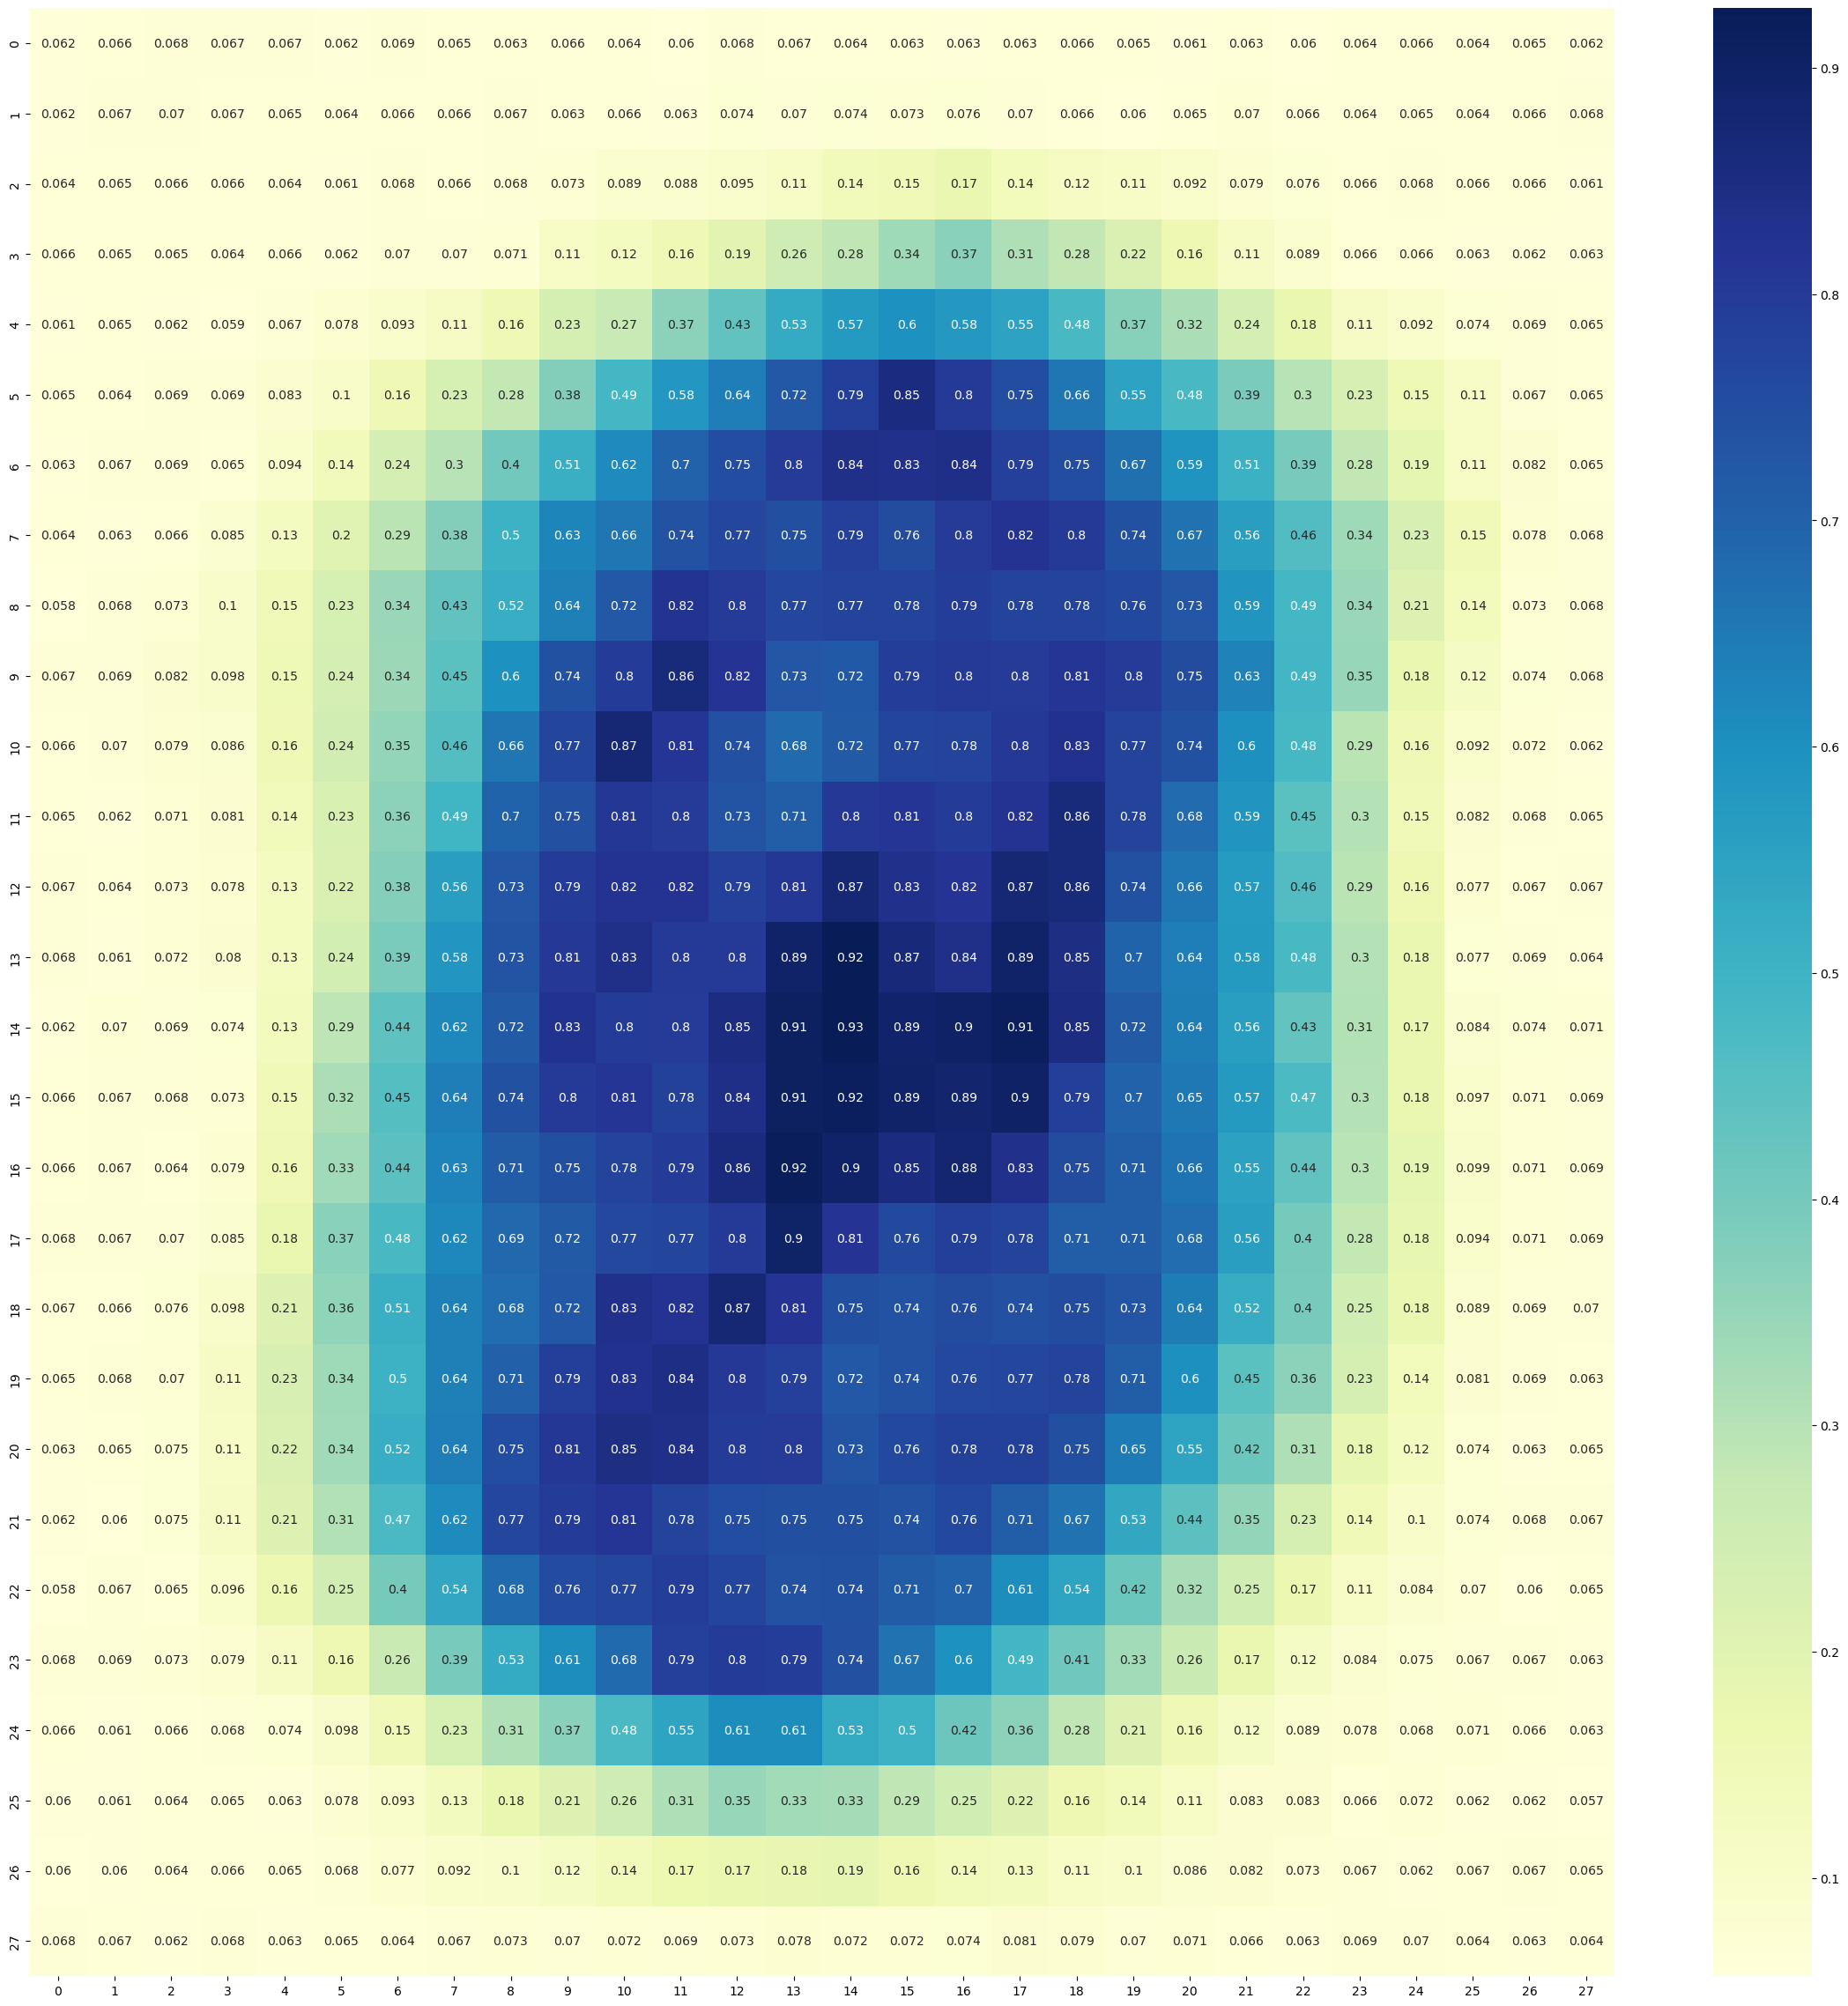

In [10]:
# Defina o tamanho desejado da matriz
square_reference = 28

# Inicialize a matriz
info_gain_matrix_index = 0
info_gain_matrix = []
info_gain_matrix.append([])

# Percorra as linhas do DataFrame e preencha a matriz com os valores da linha desejada
line_breaker = 0
for index, row in info_gain_database.iterrows():
    for item in row:
        if not('pixel' in str(item)):
            if info_gain_matrix_index < square_reference:
                info_gain_matrix[info_gain_matrix_index].append(item)
                line_breaker += 1
                if (line_breaker % square_reference == 0):
                    info_gain_matrix_index += 1
                    if info_gain_matrix_index < square_reference:
                        info_gain_matrix.append([])
                    line_breaker = 0
                    
# Crie um heatmap com seaborn
plt.figure(figsize=(29, 29))
sns.heatmap(info_gain_matrix, annot=True, cmap="YlGnBu")
plt.show()

*Discussão:*

Que diferença você nota? Qual região que possui os pixels mais importantes?

*Resposta:*

A informação obtida pelo info_gain sugere que as primeira 4 linhas, as primeiras 4 colunas, as últimas 4 linhas e as últimas 4 colunas não são tão expressivas na determinação do dígito. Isso acontece porque as amostras coletadas não fizeram bom uso do espaço disponível tornando os pixels dos cantos irrelevantes. Poderia ser feito um corte mais interessante também arredondando as bordas da matriz, mas isso implicaria em uma matriz deformada. Então essa ideia não será considerada. O plano consiste em apenas fazer as eliminações das linhas e colunas sugeridas, ocorre uma redução de 384 atributos. Antes desse filtro, o total era de 784. Com a eliminação, esse número cai para 400. É uma redução aproximada de 49% dos atributos relevantes e ainda mantém a matriz quadrada.

**Atividade 2**: Analise os atributos individuais na aba preprocessamento além do infogain de cada atributo. Identifique os atributos que não são úteis ao processo de classificação. Remova estes atributos descreva e justifique as remoções. Armazene o dataset em “mnist_sample_selecaoFeature.csv”. (dica: Analisando o infogain, você pode selecionar apenas os mais importantes alterando os parametros do “Ranker”: Clique em ranker, mude o threshold para eliminar os valores de infogain que achar pertinente. Logo após, copie a lista de “selected attributes”. Vá na aba de preprocessamento, utilize o filtro não supervisionado de atributos “Remove” com esta lista não esqueça de inverter a seleção e cuidado para não remover a classe.).Armazene o dataset em “mnist_sample_selecaoFeature.csv”. 


In [11]:
# Removendo atributos
# Removendo 4 primeiras linhas
# Removendo 4 últimas linhas
# Removendo 4 primeiras colunas
# Removendo 4 últimas colunas
square_reference = 28
start_rows = 4
start_columns = 4
last_rows = 24
last_columns = 24

# create filter
filtr = np.zeros((28,28))
for i in range(start_rows, last_rows):
    for j in range(start_columns, last_columns):
        filtr[i][j] = 1

filtr_array = []
for i in range(28):
    for j in range(28):
        filtr_array.append(int(filtr[i][j]))
        
filtr_array.append(2)

In [12]:
#handling file and filter csv
new_file = open('mnist_sample_selecaoFeature.csv', 'w')
with open('mnist_avaliacao.csv', 'r') as file:
    for line in file:
        items = line.split(',')
        for i in range(len(items)):
            if filtr_array[i] == 1:
                new_file.write(items[i]+',')
            elif filtr_array[i] == 2:
                new_file.write(items[i])

In [13]:
database = pd.read_csv('mnist_sample_selecaoFeature.csv', sep=',')

# Leia o CSV e armazene-o em um DataFrame - use a função read_csv do pandas
columns = []

info_gain_database = pd.DataFrame(columns=['Atributo', 'Ganho de Informação'])
for column in database.columns:
    if column != 'y_class':
        info_gain_database.loc[len(info_gain_database)] = {'Atributo': column, 'Ganho de Informação': ganho_informacao(database, 'y_class', column)}

print(info_gain_database)

        Atributo  Ganho de Informação
0      pixel_5_5             0.067132
1      pixel_5_6             0.078687
2      pixel_5_7             0.093451
3      pixel_5_8             0.113847
4      pixel_5_9             0.152604
..           ...                  ...
395  pixel_24_20             0.328095
396  pixel_24_21             0.263141
397  pixel_24_22             0.170583
398  pixel_24_23             0.113039
399  pixel_24_24             0.082230

[400 rows x 2 columns]


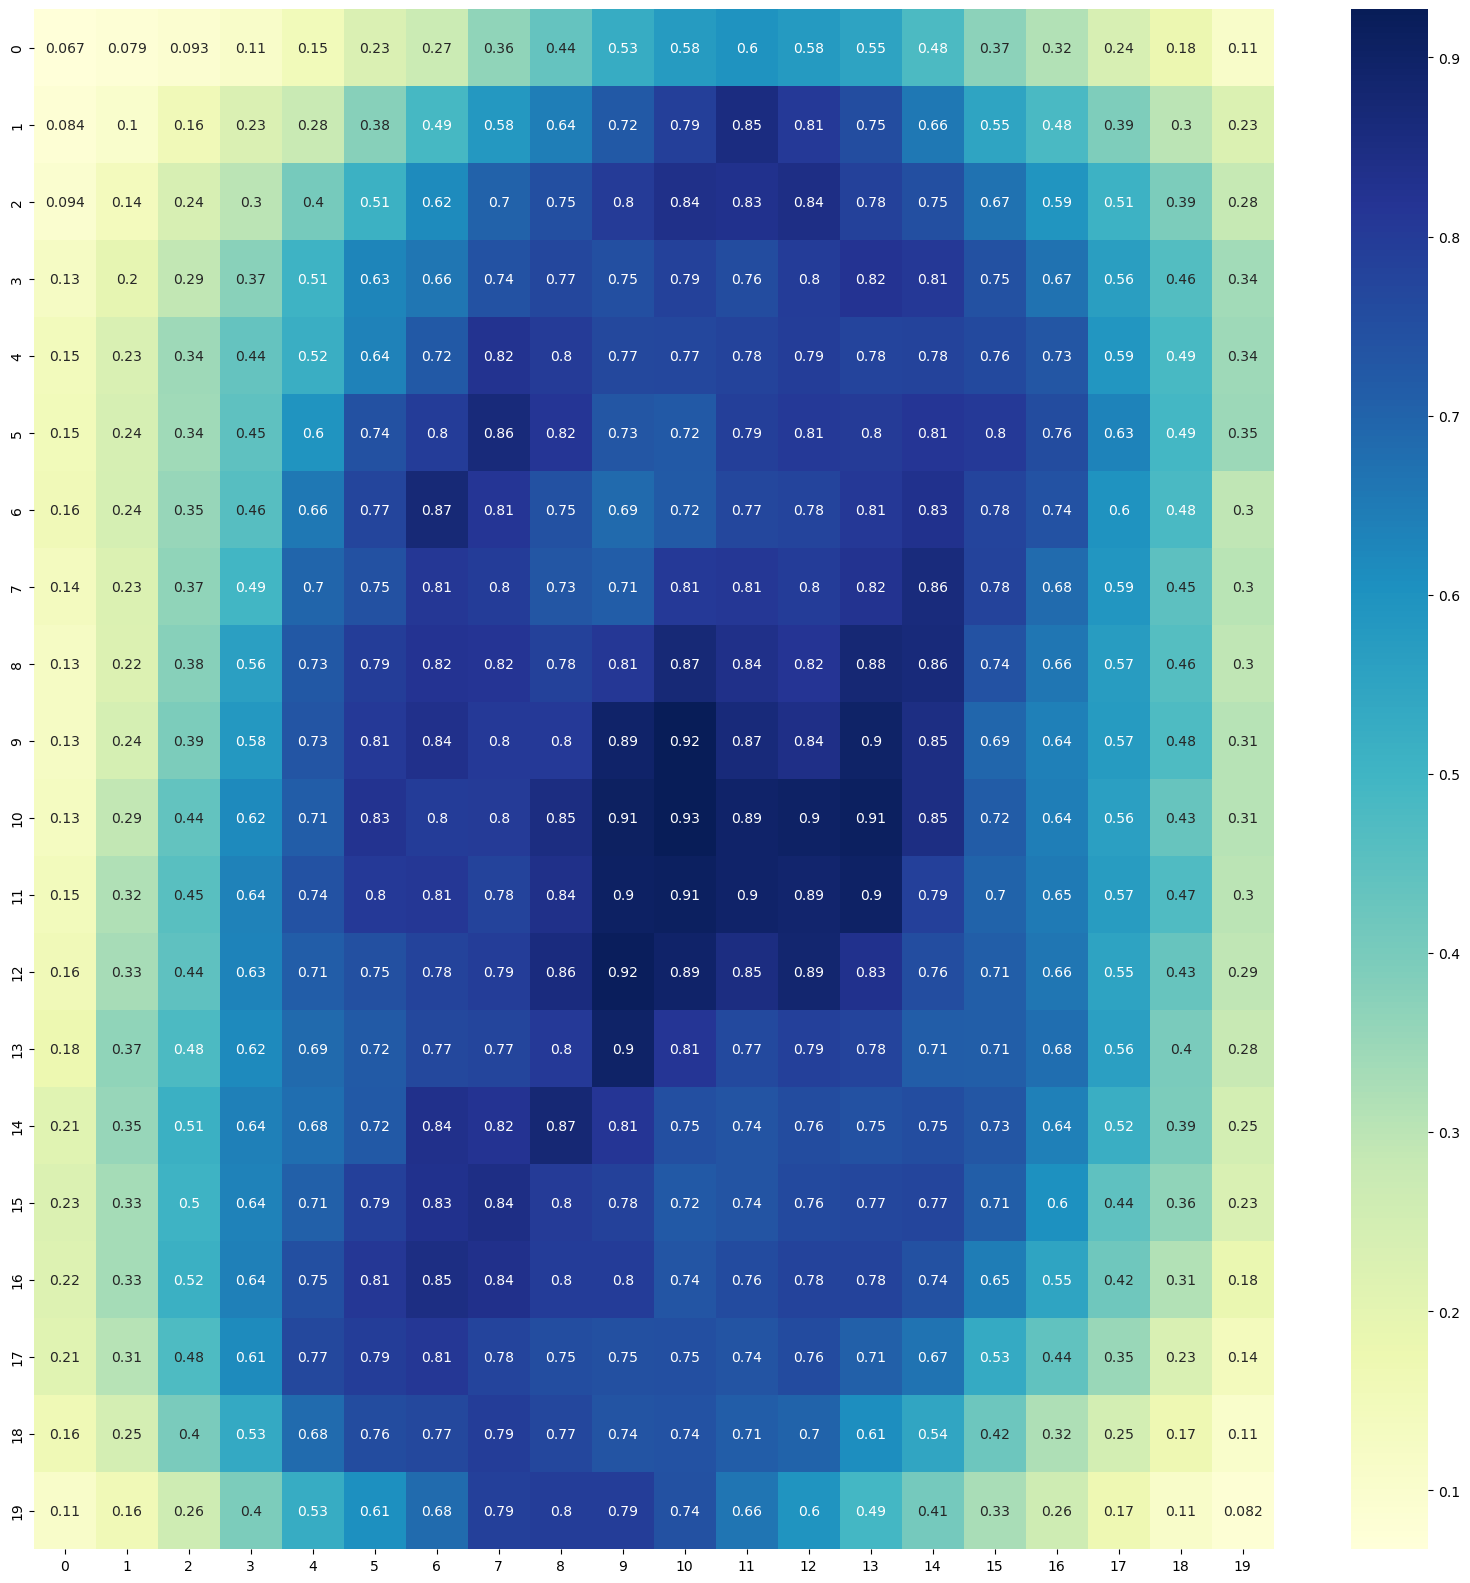

In [14]:
# Defina o tamanho desejado da matriz
square_reference = 20

# Inicialize a matriz
info_gain_matrix_index = 0
info_gain_matrix = []
info_gain_matrix.append([])

# Percorra as linhas do DataFrame e preencha a matriz com os valores da linha desejada
line_breaker = 0
for index, row in info_gain_database.iterrows():
    for item in row:
        if not('pixel' in str(item)):
            if info_gain_matrix_index < square_reference:
                info_gain_matrix[info_gain_matrix_index].append(item)
                line_breaker += 1
                if (line_breaker % square_reference == 0):
                    info_gain_matrix_index += 1
                    if info_gain_matrix_index < square_reference:
                        info_gain_matrix.append([])
                    line_breaker = 0
                    
# Crie um heatmap com seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(info_gain_matrix, annot=True, cmap="YlGnBu")
plt.show()

**Atividade 3**: Re-avalie a base usando NB e  J48 no Weka. Compare o resultado com o que você obteve em I(d). Qual foi o benefício de realizar esta remoções?


## Parte 3 - Transformação de atributos

Usando o dataset “mnist_sample_selecaoFeature.arff”. Mude os atributos de numéricos para booleanos. Então re-avalie utilizando  NB e J48. (Dica: Utilize o filtro de atributos NumericToBinary).

**Atividade 1**: Em comparação com o resultado em 2(c), houve ganho no desempenho? Analise e reporte a diferença do desempenho por classe e geral. Com base no que se aprendeu sobre árvore de decisão e a forma que ela é criada para atributos numéricos, justifique o impacto utilizando J48. Armazene o dataset em “mnist_sample_binario.arff”.


## Parte 4 - Resultado no teste
Faça todo o processamento que você fez no treino/validação no teste ou seja: elimine os atributos que você julgou necessário em (2) e faça a mesma transformação de (3). Apresente o resultado obtido.

[Utilize CNN no Keras](https://keras.io/examples/vision/mnist_convnet/) na base de dados testada e compare os resultados de cada fase avaliada (exercícios 1, 2 e 3).